### Employee Attrition Predictor

In [18]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("Employee-Attrition.csv") # Import data.

In [20]:
pd.options.display.max_columns = 500
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [21]:
# Attrition is the target variable in this dataset.

#### Data Preprocessing

###### Binary Features: Attition, Gender, Over18, OverTime

Convert to 0 or 1 for binary representation.

###### One-Hot Encoded Features: Business Travel, Department, EducationField, JobRole, MaritalStatus

One hot encode so each unqiue variable within these colunns is a different binary feature.

###### Drop unnecessary columns that do not give useful information: EmployeeNumber, EmployeeCount, Over18, StandardHours

In [22]:
df.OverTime.value_counts() # Count the number of each value in a column.

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [23]:
# Binary Features: Attition, Gender, Over18, OverTime
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Over18"] = df["Over18"].apply(lambda x: 1 if x == "Y" else 0)
df["OverTime"] = df["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

In [24]:
# One-Hot Encoded Features: Business Travel, Department, EducationField, JobRole, MaritalStatus
df = df.join(pd.get_dummies(df["BusinessTravel"])) # One-hot code the three answers and join to the dataframe.
df = df.drop("BusinessTravel", axis=1) # Drop original column.
df = df.join(pd.get_dummies(df["Department"], prefix="Department")) # Gives the "Department_" prefix to each new feature column.
df = df.drop("Department", axis=1) # Drop original column.
df = df.join(pd.get_dummies(df["EducationField"], prefix="Education")) # Gives the "Education_" prefix to each new feature column.
df = df.drop("EducationField", axis=1) # Drop original column.
df = df.join(pd.get_dummies(df["JobRole"], prefix="Job_Role")) # Gives the "Job_Role_" prefix to each new feature column.
df = df.drop("JobRole", axis=1) # Drop original column.
df = df.join(pd.get_dummies(df["MaritalStatus"])) # One-hot code the answers and join to the dataframe.
df = df.drop("MaritalStatus", axis=1) # Drop original column.

In [25]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Job_Role_Healthcare Representative,Job_Role_Human Resources,Job_Role_Laboratory Technician,Job_Role_Manager,Job_Role_Manufacturing Director,Job_Role_Research Director,Job_Role_Research Scientist,Job_Role_Sales Executive,Job_Role_Sales Representative,Divorced,Married,Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False


In [26]:
# Convert all of the one-hot encoded features that are True or False by default to 0 or 1.
df = df.map(lambda x: 1 if x == True else 0 if x == False else x)

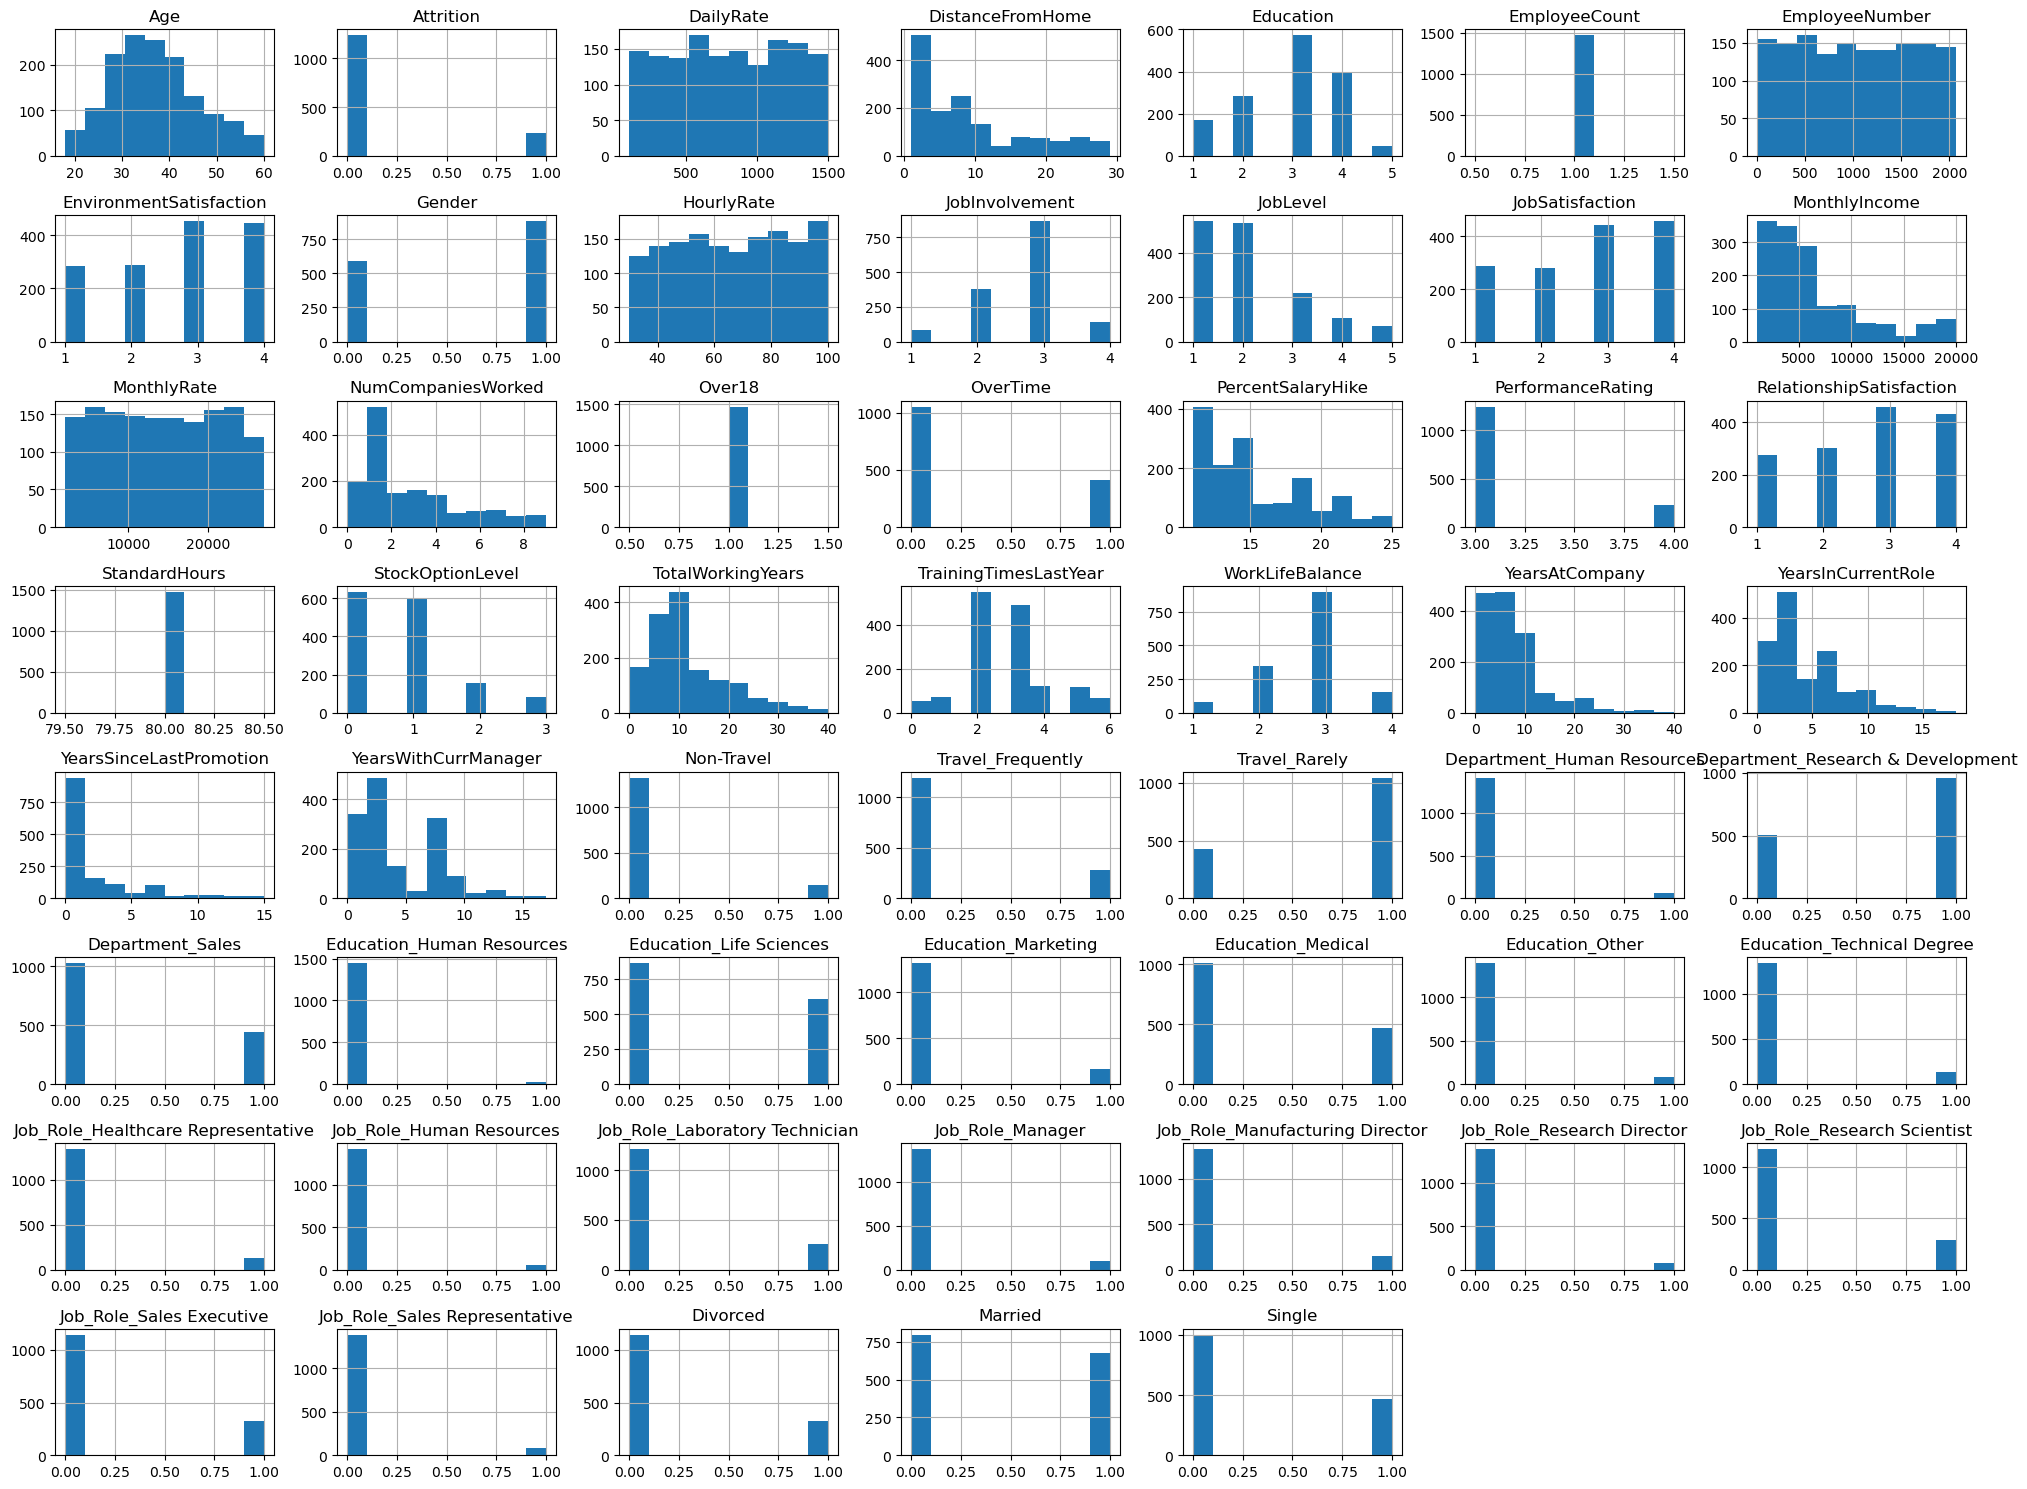

In [27]:
df.hist(figsize=(20,15)) # Plot histograms of each columns data.
plt.tight_layout()
plt.show() 

In [28]:
# Drop unnecessary columns that do give any insight.
df = df.drop("EmployeeNumber", axis=1) # Every employee has a different number.
df = df.drop("EmployeeCount", axis=1) # Every value is 1, no value in this data.
df = df.drop("Over18", axis=1) # All employees over 18, no value in this data.
df = df.drop("StandardHours", axis=1) # Only one value of 80.

In [29]:
# Preproccessed data
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Job_Role_Healthcare Representative,Job_Role_Human Resources,Job_Role_Laboratory Technician,Job_Role_Manager,Job_Role_Manufacturing Director,Job_Role_Research Director,Job_Role_Research Scientist,Job_Role_Sales Executive,Job_Role_Sales Representative,Divorced,Married,Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


#### Model training

In [30]:
X, y = df.drop("Attrition", axis=1), df["Attrition"] # Split into data and labels.

# Split into training and test data 80:20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Creat Random Forest Classifier and fit with training data.
model = RandomForestClassifier(n_jobs=1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1)

In [32]:
model.score(X_test, y_test) # Check accuracy of the model.

0.8809523809523809

In [33]:
# View importance of features as a sorted list from highest to lowest.
sorted_list = sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True)
sorted_dict = dict(sorted_list) # Convert to dictionary for readability.
sorted_dict

{'MonthlyIncome': 0.06694157106754792,
 'Age': 0.06283348221092652,
 'OverTime': 0.05100210430857079,
 'DailyRate': 0.049731772781327704,
 'TotalWorkingYears': 0.04774824819349886,
 'DistanceFromHome': 0.04701821010144476,
 'MonthlyRate': 0.044905227447396286,
 'HourlyRate': 0.04217532486057252,
 'YearsAtCompany': 0.03870685070832802,
 'PercentSalaryHike': 0.03669044302237732,
 'StockOptionLevel': 0.03323446186761728,
 'YearsWithCurrManager': 0.03288645822027745,
 'NumCompaniesWorked': 0.03141478081143864,
 'EnvironmentSatisfaction': 0.03088974707657642,
 'JobSatisfaction': 0.029471472338168637,
 'YearsInCurrentRole': 0.027982054989858684,
 'YearsSinceLastPromotion': 0.027499559892586244,
 'TrainingTimesLastYear': 0.02618773003814436,
 'RelationshipSatisfaction': 0.024394221714941794,
 'JobLevel': 0.023448237467847174,
 'WorkLifeBalance': 0.022619420628654237,
 'JobInvolvement': 0.021865330937907674,
 'Education': 0.01803450207939919,
 'Single': 0.01644423480087888,
 'Travel_Frequently

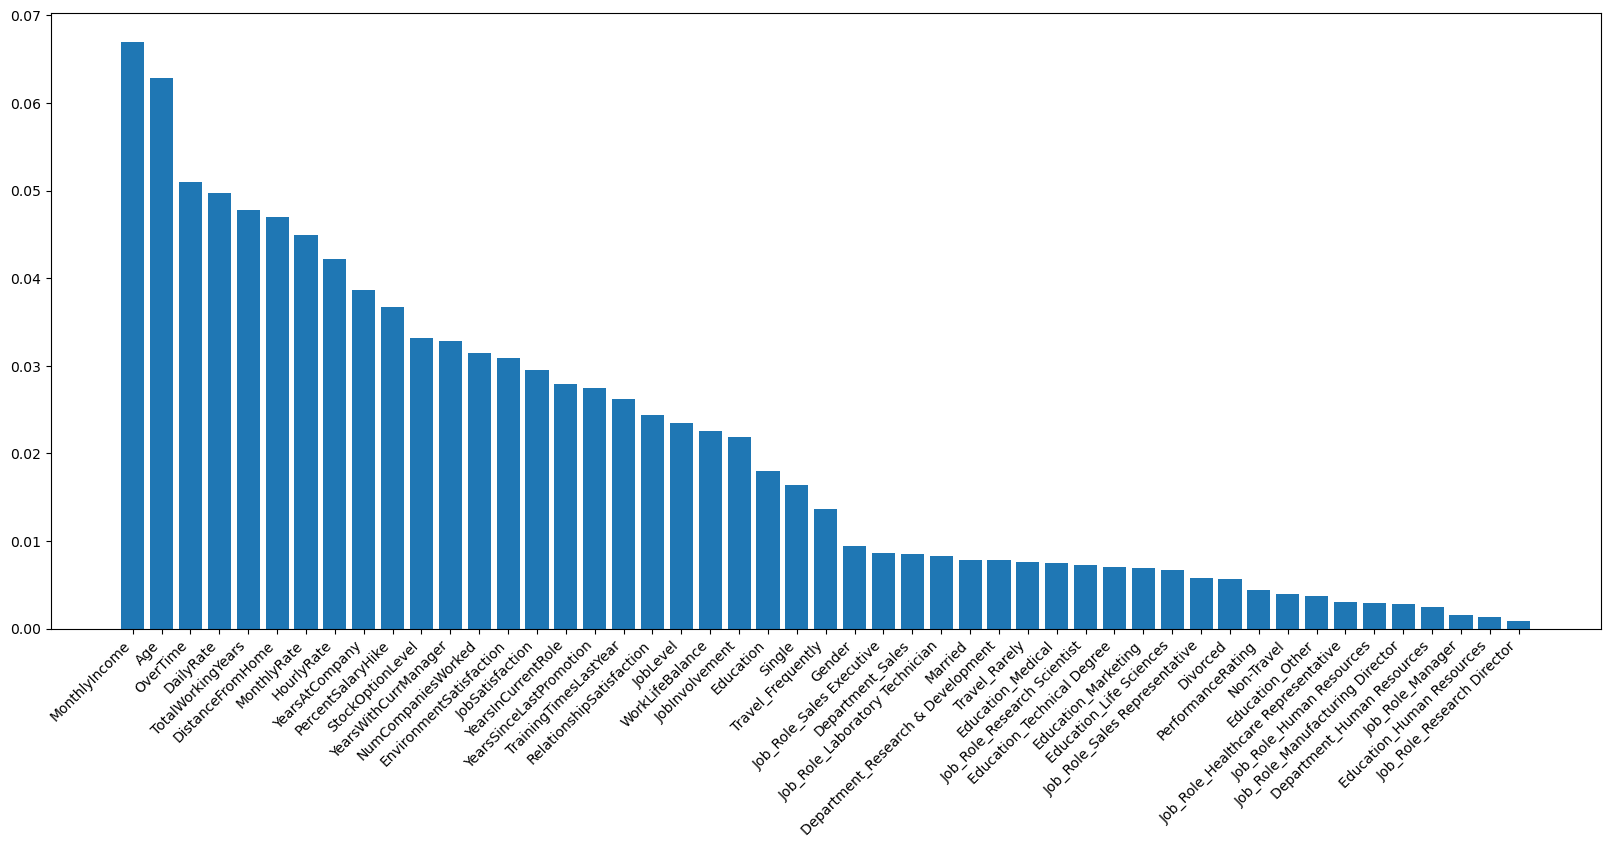

In [34]:
# View feature importance as a bar graph.
plt.figure(figsize=(20,8))
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xticks(rotation=45, ha="right") # x lables at 45 degree angle with right horizontal alignment.
plt.show()